In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
#drop the first columns as the data is self-indexed
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Data Analysis

### **Analyse the dataset to try to understand what we are about to solve**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

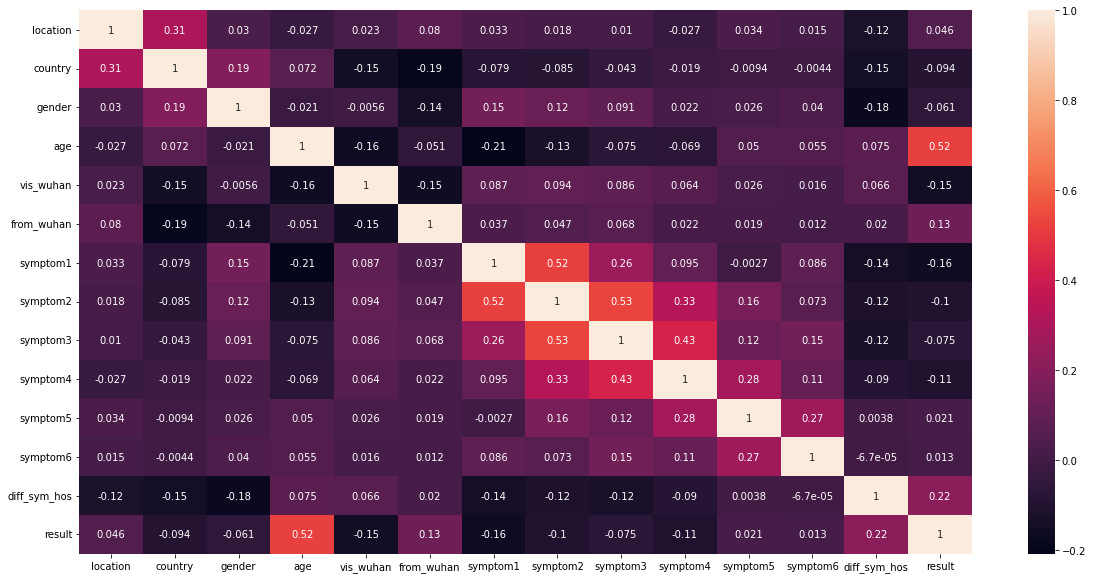

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

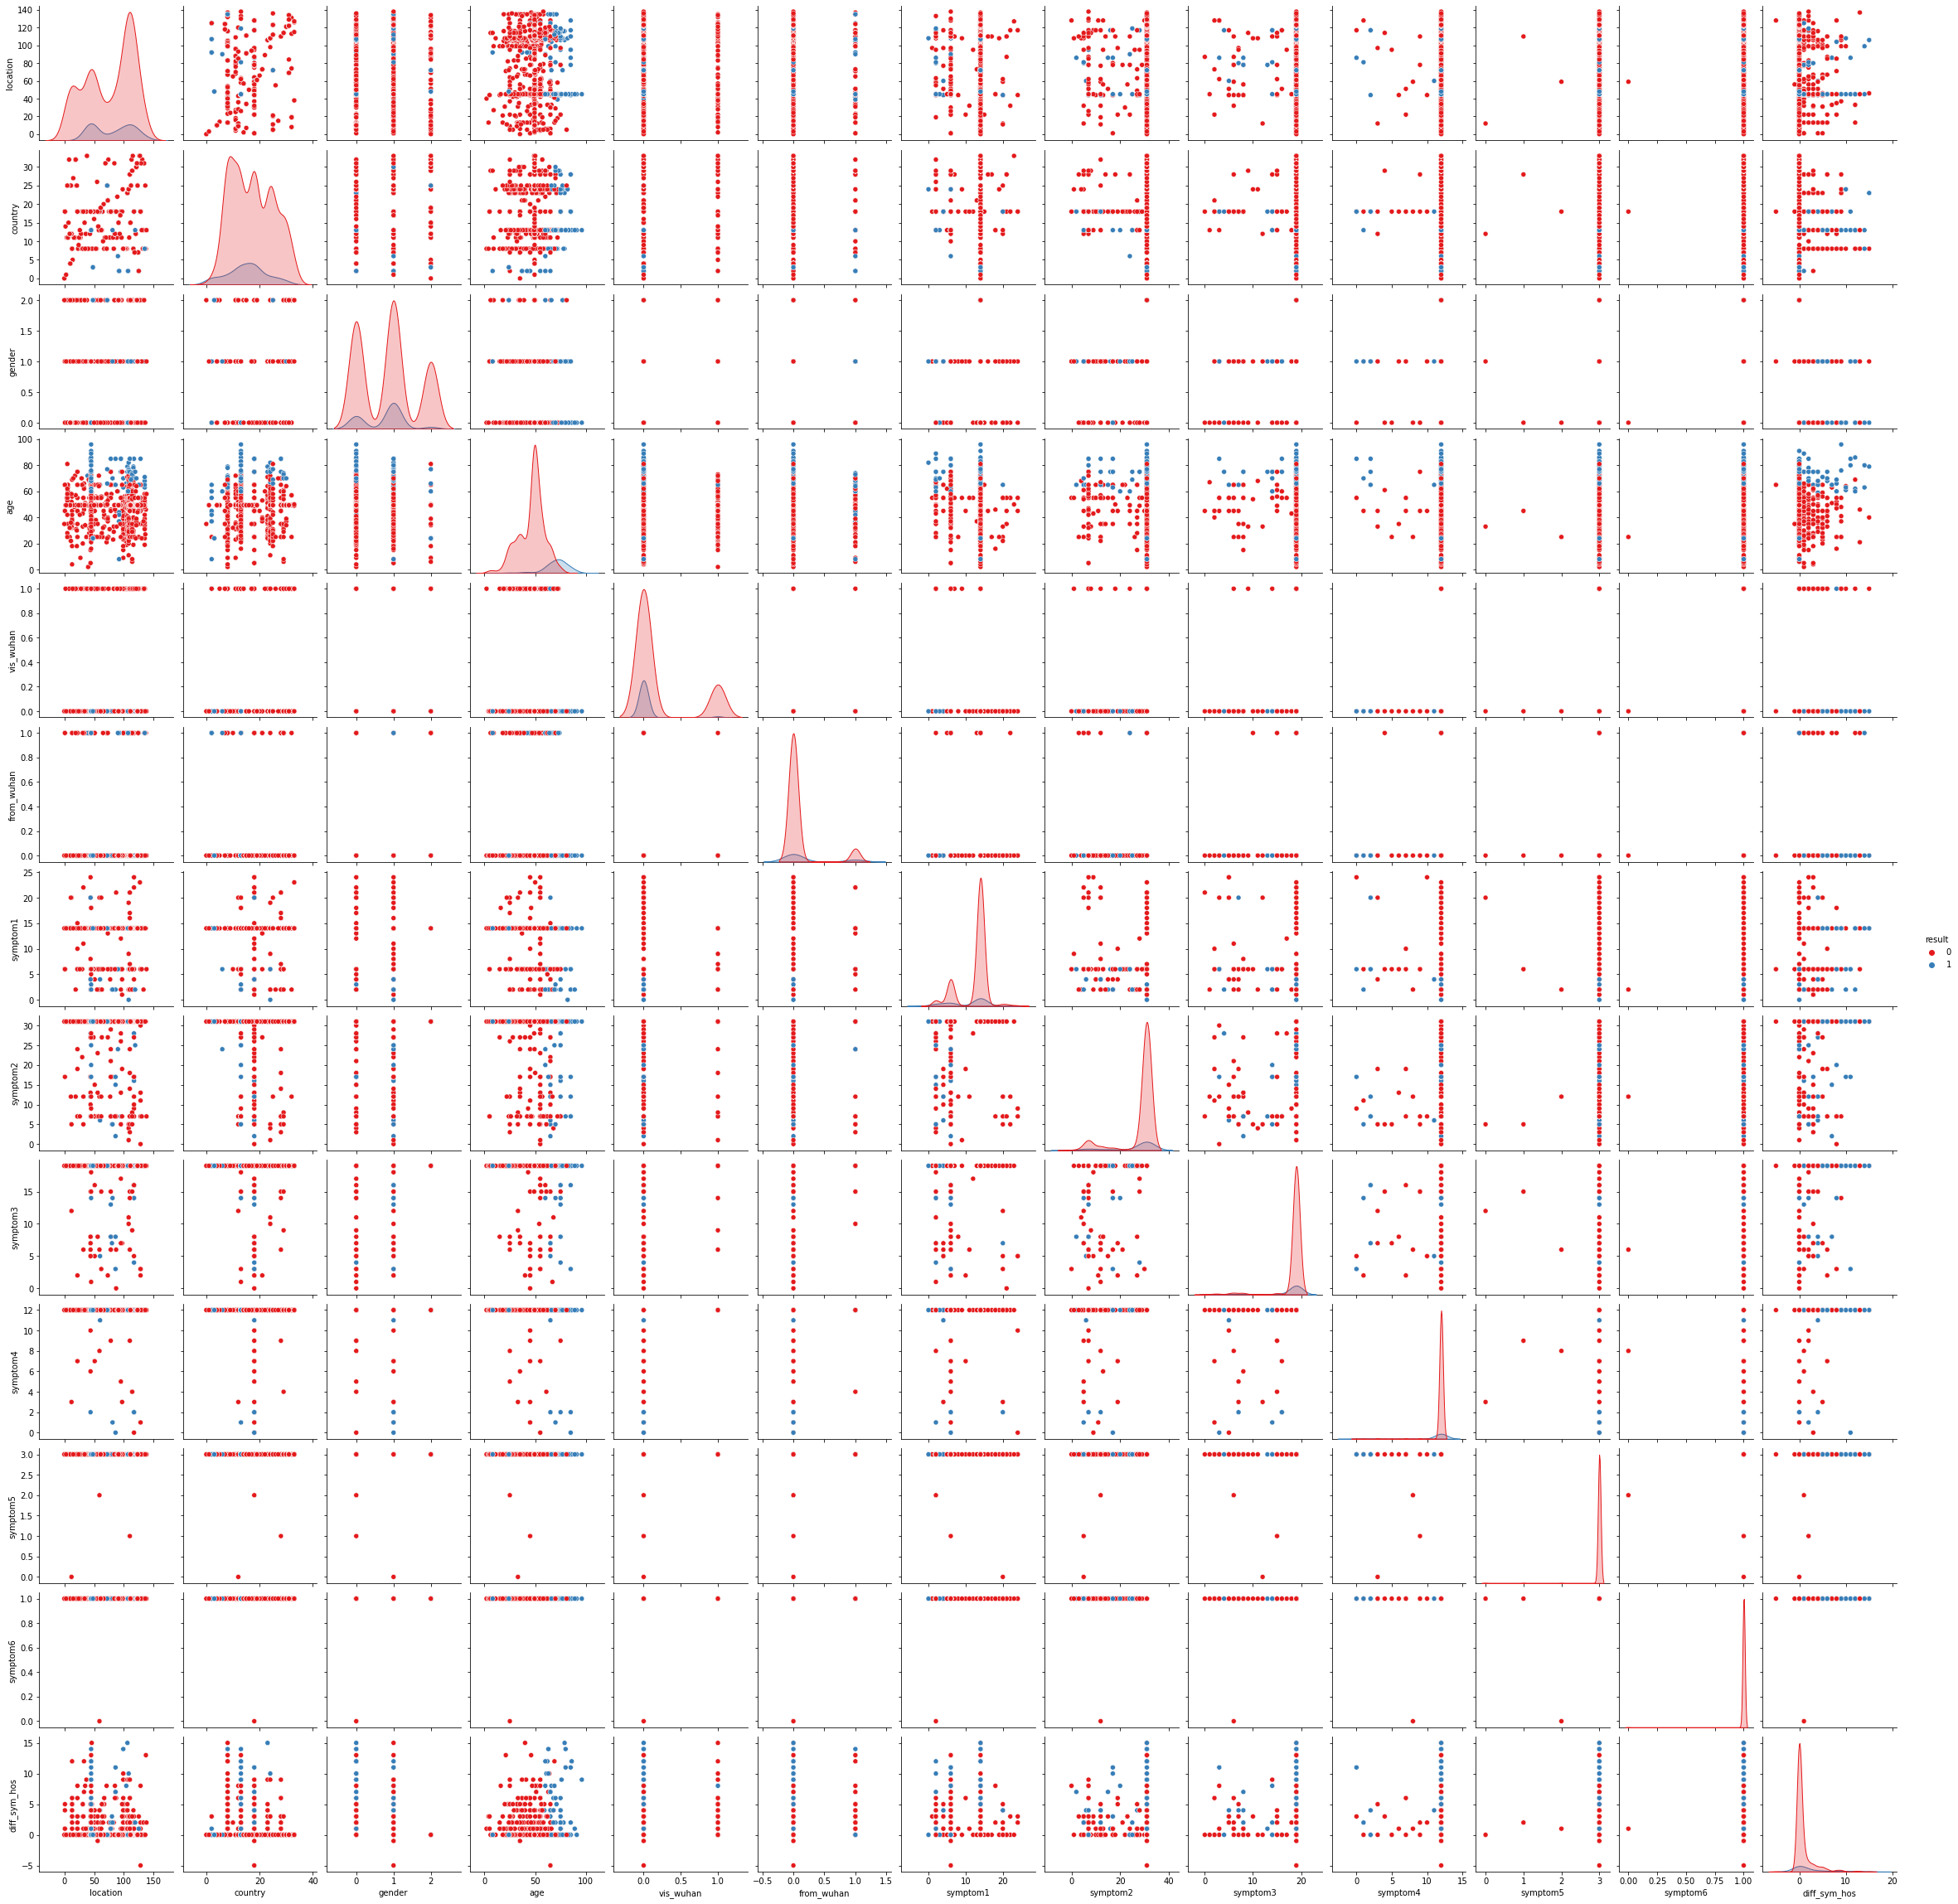

In [8]:
sns.pairplot(data=df, hue='result', palette='Set1')

In [9]:
df['symptom1'].value_counts()

14    644
6     143
2      37
4       7
20      7
21      3
18      2
22      2
24      2
15      1
0       1
5       1
23      1
16      1
17      1
7       1
9       1
19      1
13      1
11      1
8       1
12      1
1       1
10      1
3       1
Name: symptom1, dtype: int64

In [10]:
rare_symptom1 = [20,4,21,24,22,18,9,1,3,5,7,8,12,10,11,23,13,15,16,17,19,0]
df = df.drop(df[df['symptom1'].isin(rare_symptom1)].index)

In [12]:
df['symptom1'].value_counts()

14    644
6     143
2      37
Name: symptom1, dtype: int64

In [13]:
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [14]:
df['symptom2'].value_counts(normalize=True)

31    0.860437
7     0.060680
17    0.015777
27    0.009709
5     0.007282
12    0.007282
24    0.004854
13    0.004854
28    0.003641
25    0.002427
16    0.001214
26    0.001214
20    0.001214
8     0.001214
14    0.001214
3     0.001214
18    0.001214
4     0.001214
29    0.001214
10    0.001214
23    0.001214
21    0.001214
11    0.001214
22    0.001214
2     0.001214
0     0.001214
30    0.001214
15    0.001214
9     0.001214
Name: symptom2, dtype: float64

In [15]:
rare_symptom2 = [27,5,12,24,13,28,25,3,8,9,2,10,11,4,16,14,15,30,18,20,21,22,23,26,29,0]
df = df.drop(df[df['symptom2'].isin(rare_symptom2)].index)

In [16]:
df['symptom2'].value_counts()

31    709
7      50
17     13
Name: symptom2, dtype: int64

In [17]:
df['symptom3'].value_counts()

19    751
8       5
16      5
14      3
15      3
6       3
3       1
13      1
Name: symptom3, dtype: int64

In [18]:
rare_symptom3 = [16,8,15,14,6,13,3]
df = df.drop(df[df['symptom3'].isin(rare_symptom3)].index)

In [19]:
df['symptom3'].value_counts()

19    751
Name: symptom3, dtype: int64

In [20]:
df['symptom4'].value_counts()

12    751
Name: symptom4, dtype: int64

In [21]:
df['symptom5'].value_counts()

3    751
Name: symptom5, dtype: int64

In [22]:
df['symptom6'].value_counts()

1    751
Name: symptom6, dtype: int64

In [23]:
df['result'].value_counts()

0    670
1     81
Name: result, dtype: int64

In [24]:
df['result'].value_counts(normalize=True)

0    0.892144
1    0.107856
Name: result, dtype: float64

In [25]:
df['country'].value_counts()

8     155
18    101
24     81
13     75
12     53
29     35
11     35
23     31
25     31
28     21
30     17
4      17
15     14
31     14
32     14
2      11
7      10
19      9
33      7
14      3
17      3
21      2
3       2
22      1
10      1
26      1
5       1
16      1
20      1
0       1
1       1
9       1
27      1
Name: country, dtype: int64

In [26]:
df['country'].value_counts(normalize=True)

8     0.206391
18    0.134487
24    0.107856
13    0.099867
12    0.070573
29    0.046605
11    0.046605
23    0.041278
25    0.041278
28    0.027963
30    0.022636
4     0.022636
15    0.018642
31    0.018642
32    0.018642
2     0.014647
7     0.013316
19    0.011984
33    0.009321
14    0.003995
17    0.003995
21    0.002663
3     0.002663
22    0.001332
10    0.001332
26    0.001332
5     0.001332
16    0.001332
20    0.001332
0     0.001332
1     0.001332
9     0.001332
27    0.001332
Name: country, dtype: float64

In [27]:
rare_countries = [33,17,14,21,3,16,20,10,9,22,5,26,27,1,0]
df = df.drop(df[df['country'].isin(rare_countries)].index) 

In [28]:
df['country'].value_counts()

8     155
18    101
24     81
13     75
12     53
29     35
11     35
23     31
25     31
28     21
30     17
4      17
31     14
32     14
15     14
2      11
7      10
19      9
Name: country, dtype: int64

In [29]:
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,10,4,1,49.4,0,0,14,31,19,12,3,1,0,0
853,10,4,1,49.4,0,0,14,31,19,12,3,1,0,0
854,10,4,1,49.4,0,0,14,31,19,12,3,1,0,0
855,10,4,0,49.4,0,0,14,31,19,12,3,1,0,0


# Applying One Hot Encoding

In [30]:
df = pd.get_dummies(df, columns = ['gender', 'location', 'country', 'symptom1', 'symptom2', 'symptom3', 'symptom4',
       'symptom5', 'symptom6', 'diff_sym_hos'])

In [31]:
df

,age,vis_wuhan,from_wuhan,result,gender_0,gender_1,gender_2,location_1,location_4,location_5,...,diff_sym_hos_6,diff_sym_hos_7,diff_sym_hos_8,diff_sym_hos_9,diff_sym_hos_10,diff_sym_hos_11,diff_sym_hos_12,diff_sym_hos_13,diff_sym_hos_14,diff_sym_hos_15
0,66.0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,56.0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49.4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
853,49.4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,49.4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
855,49.4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df[['age']] = scaler.fit_transform(df[['age']])

In [33]:
df[['age']]

,age
0,0.680851
1,0.574468
2,0.468085
3,0.617021
4,0.595745
...,...
852,0.504255
853,0.504255
854,0.504255
855,0.504255


In [35]:
df.to_csv('preprocessed_data.csv')